# NYC Noise Analysis
## 1 Introduction
This is a Exploratory Data Analysis for 2015 New York City Noise Level Based on 311 Service Requests in all 5 boroughs of New York City. The results shown in this notebook will be used for building the TripElf interactive map application.

### 1.1 Load Librarys

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import geopandas, fiona
import pyproj    
import shapely
import shapely.ops as ops
from shapely.geometry import Point
from functools import partial

import matplotlib.colors as colors
import matplotlib.cm as cmx

### 1.2  Load Data

In [4]:
df = pd.read_csv('/Users/Ada/Downloads/NYCnoise.csv', low_memory=False)
neighbourhoods_geo = geopandas.read_file("neighbourhoods.geojson")

In [20]:
# keep 2015 record only
df = df[df['Created Date'].str.contains("2015")]

In [69]:
neighbourhoods_nyc = pd.read_csv("neighbourhoods_nyc.csv")

### 1.3 Preprocessing data

In [50]:
# run mapping function
def append_neighborhood(df, geo_df):
    # Create a list of Point objects
    point_list = []
    for idx, biz in df.iterrows():
        point_list.append(Point(biz["Longitude"], biz["Latitude"]))
    
    # Create a list of Polygon
    polygon_list = list(geo_df["geometry"])
    
    neighborhood_list = []
    neighborhood_group_list = []
    flag = True
    for i, point in enumerate(point_list):
        print(i, end='\r', flush=True)
        for j, polygon in enumerate(polygon_list):
            if point.within(polygon):
                neighborhood_list.append(neighbourhoods_geo.iloc[j][0])
                neighborhood_group_list.append(neighbourhoods_geo.iloc[j][1])
                break
            if j == len(polygon_list) - 1:
                neighborhood_list.append(None)
                neighborhood_group_list.append(None)
    
    df["neighborhood"] = neighborhood_list
    df["neighborhood_group"] = neighborhood_group_list
    df = df[~df["neighborhood"].isna()]
    return df

In [53]:
df = append_neighborhood(df, neighbourhoods_geo)

### 1.3 File structure and content

In [ ]:
df.shape

In [57]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,neighborhood,neighborhood_group
1,32218576,12/16/2015,12/18/2015,DEP,Department of Environmental Protection,Noise,Noise: air condition/ventilation equipment (NV1),NaN,11377.0,49-12 QUEENS BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,40.742795,-73.915620,"(40.742794666185695, -73.91561976136614)",Sunnyside,Queens
2,32218591,12/16/2015,12/18/2015,DEP,Department of Environmental Protection,Noise,Noise: air condition/ventilation equipment (NV1),NaN,11204.0,7000 BAY PARKWAY,...,NaN,NaN,NaN,NaN,NaN,40.610927,-73.984477,"(40.61092717571984, -73.98447693156508)",Bensonhurst,Brooklyn
3,32218793,12/16/2015,12/16/2015,NYPD,New York City Police Department,Noise - Vehicle,Engine Idling,Street/Sidewalk,11201.0,CLINTON STREET,...,NaN,NaN,NaN,NaN,NaN,40.695539,-73.991810,"(40.69553857126335, -73.99181029552801)",Brooklyn Heights,Brooklyn
4,32219051,12/17/2015,12/17/2015,NYPD,New York City Police Department,Noise - Commercial,Banging/Pounding,Store/Commercial,11217.0,608 DEGRAW STREET,...,NaN,NaN,NaN,NaN,NaN,40.679294,-73.983780,"(40.67929416643323, -73.98377961007212)",Gowanus,Brooklyn
5,32219057,12/17/2015,12/18/2015,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,11226.0,75 MARTENSE STREET,...,NaN,NaN,NaN,NaN,NaN,40.651343,-73.956567,"(40.651342523766246, -73.95656673827526)",Flatbush,Brooklyn


### 1.4 Missing Values

In [23]:
df.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2557
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                             0
Location Type                      57405
Incident Zip                        2997
Incident Address                   44883
Street Name                        44883
Cross Street 1                     37527
Cross Street 2                     38256
Intersection Street 1             342370
Intersection Street 2             342915
Address Type                        2434
City                                2994
Landmark                          387202
Facility Type                      61103
Status                                 0
Due Date                           57559
Resolution Action Updated Date      2527
Community Board                        0
Borough                                0
X Coordinate (St

## 2 Individual feature visualizations
### 2.1 Categories & Count

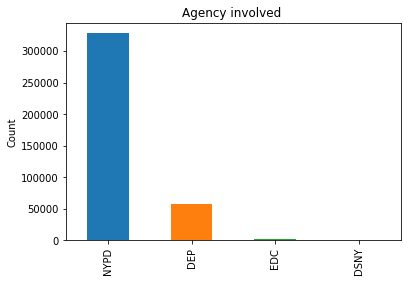

NYPD    328358
DEP      57365
EDC       1505
DSNY       193
Name: Agency, dtype: int64

In [25]:
df['Agency'].value_counts().plot.bar()
plt.ylabel('Count')
plt.title('Agency involved')
plt.show()
df['Agency'].value_counts()

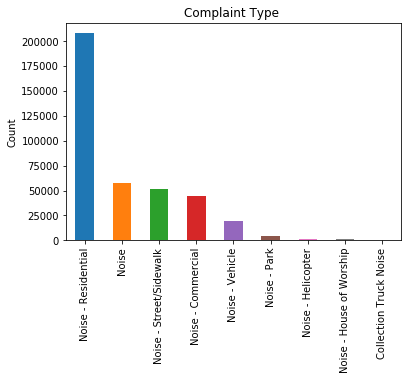

Noise - Residential         208026
Noise                        57365
Noise - Street/Sidewalk      51692
Noise - Commercial           44109
Noise - Vehicle              19352
Noise - Park                  4109
Noise - Helicopter            1505
Noise - House of Worship      1070
Collection Truck Noise         193
Name: Complaint Type, dtype: int64

In [32]:
df['Complaint Type'].value_counts().plot.bar()
plt.ylabel('Count')
plt.title('Complaint Type')
plt.show()
df['Complaint Type'].value_counts()

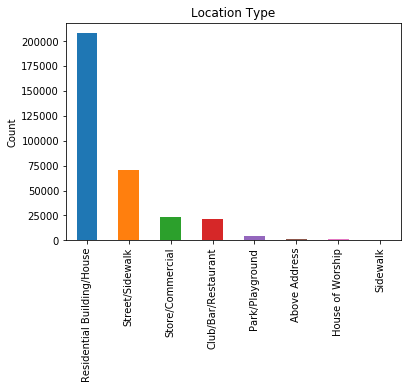

Residential Building/House    208009
Street/Sidewalk                71030
Store/Commercial               23059
Club/Bar/Restaurant            21044
Park/Playground                 4108
Above Address                   1505
House of Worship                1068
Sidewalk                         193
Name: Location Type, dtype: int64

In [36]:
df['Location Type'].value_counts().plot.bar()
plt.ylabel('Count')
plt.title('Location Type')
plt.show()
df['Location Type'].value_counts()


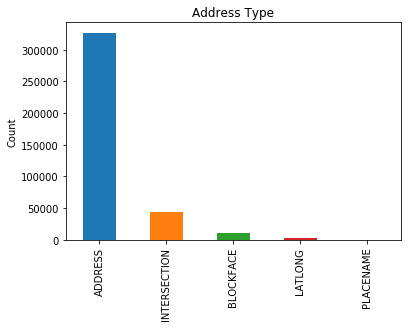

ADDRESS         326845
INTERSECTION     44499
BLOCKFACE        10786
LATLONG           2638
PLACENAME          219
Name: Address Type, dtype: int64

In [37]:
df['Address Type'].value_counts().plot.bar()
plt.ylabel('Count')
plt.title('Address Type')
plt.show()
df['Address Type'].value_counts()

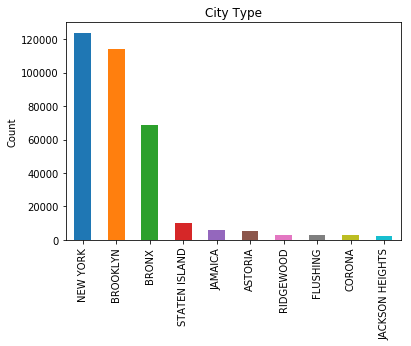

NEW YORK           123898
BROOKLYN           114195
BRONX               68606
STATEN ISLAND       10202
JAMAICA              5995
ASTORIA              5367
RIDGEWOOD            3188
FLUSHING             3007
CORONA               2848
JACKSON HEIGHTS      2332
Name: City, dtype: int64

In [39]:
df['City'].value_counts()[:10].plot.bar()
plt.ylabel('Count')
plt.title('City Type')
plt.show()
df['City'].value_counts()[:10]

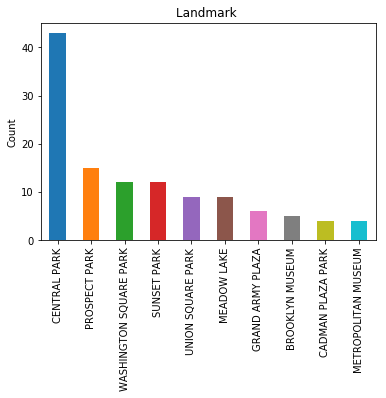

CENTRAL PARK              43
PROSPECT PARK             15
WASHINGTON SQUARE PARK    12
SUNSET PARK               12
UNION SQUARE PARK          9
MEADOW LAKE                9
GRAND ARMY PLAZA           6
BROOKLYN MUSEUM            5
CADMAN PLAZA PARK          4
METROPOLITAN MUSEUM        4
Name: Landmark, dtype: int64

In [40]:
df['Landmark'].value_counts()[:10].plot.bar()
plt.ylabel('Count')
plt.title('Landmark ')
plt.show()
df['Landmark'].value_counts()[:10]

Residential noise is the major noise complaint.

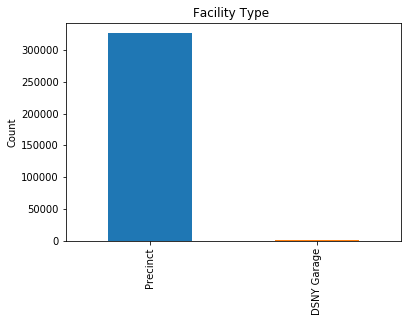

Precinct       326157
DSNY Garage       161
Name: Facility Type, dtype: int64

In [41]:
df['Facility Type'].value_counts().plot.bar()
plt.ylabel('Count')
plt.title('Facility Type ')
plt.show()
df['Facility Type'].value_counts()

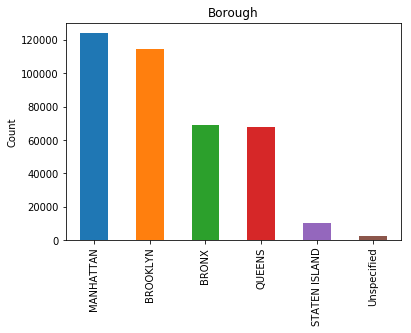

MANHATTAN        124142
BROOKLYN         114350
BRONX             68677
QUEENS            67608
STATEN ISLAND     10222
Unspecified        2422
Name: Borough, dtype: int64

In [49]:
df['Borough'].value_counts().plot.bar()
plt.ylabel('Count')
plt.title('Borough')
plt.show()
df['Borough'].value_counts()

### 2.2 Noise incident occurred time

In [59]:
df['Created Date'].describe()

count         379649
unique           365
top       05/10/2015
freq            2607
Name: Created Date, dtype: object

In [60]:
df['Closed Date'].describe()

count         379221
unique           401
top       06/07/2015
freq            2672
Name: Closed Date, dtype: object

### 2.3 Lantitude&Longtitude


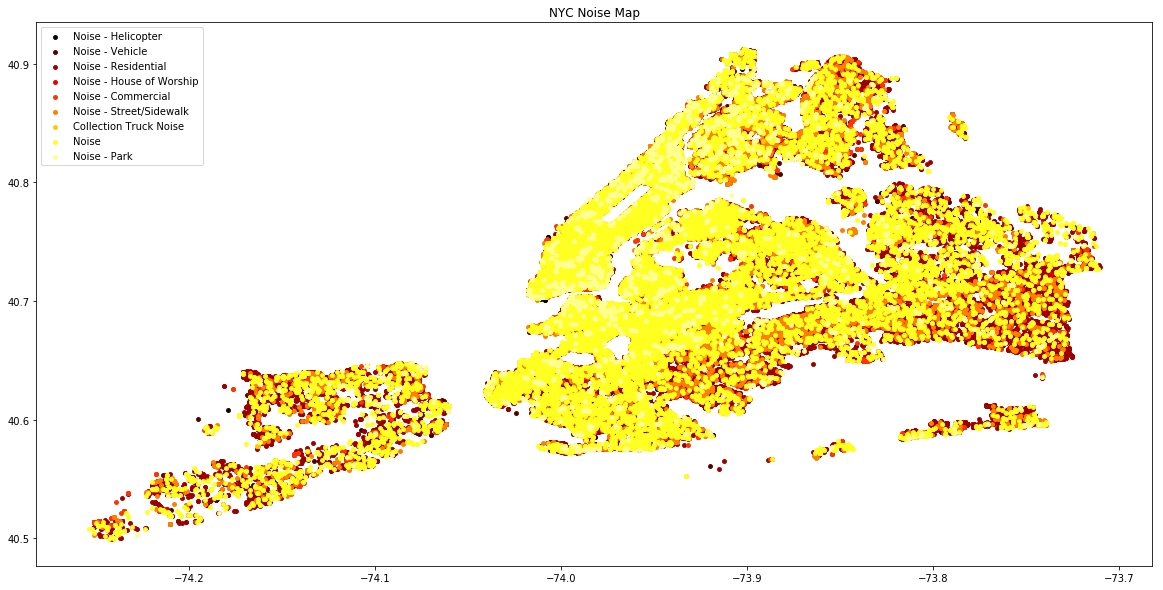

In [67]:
plt.figure(figsize=(20,10))

#Scatter of Petal
x=df['Longitude']
y=df['Latitude']

# Get unique names of complaint types
uniq = list(set(df['Complaint Type']))

# Set the color map to match the number of species
z = range(1,len(uniq))
hot = plt.get_cmap('hot')
cNorm  = colors.Normalize(vmin=0, vmax=len(uniq))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=hot)

# Plot each species
for i in range(len(uniq)):
    indx = df['Complaint Type'] == uniq[i]
    plt.scatter(x[indx], y[indx], s=15, color=scalarMap.to_rgba(i), label=uniq[i])

plt.title('NYC Noise Map')
plt.legend(loc='upper left')
plt.show()

## 3 Feature relations with neightborhood
### 3.1 Count

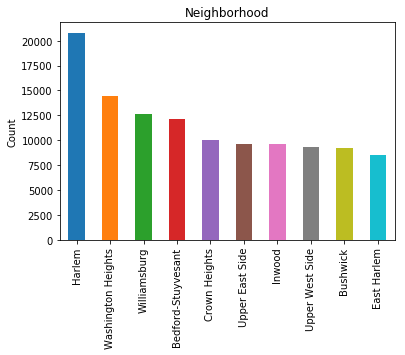

Harlem                20800
Washington Heights    14443
Williamsburg          12660
Bedford-Stuyvesant    12090
Crown Heights         10024
Upper East Side        9653
Inwood                 9653
Upper West Side        9340
Bushwick               9198
East Harlem            8477
Name: neighborhood, dtype: int64

In [68]:
df['neighborhood'].value_counts()[:10].plot.bar()
plt.ylabel('Count')
plt.title('Neighborhood')
plt.show()
df['neighborhood'].value_counts()[:10]

###  3.2 Density¶

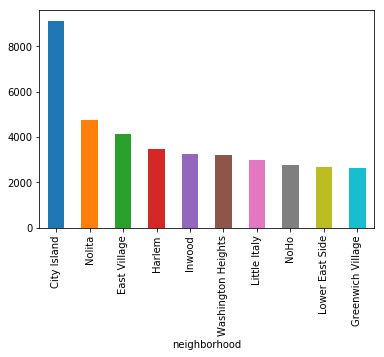

In [71]:
density_df = df.groupby(["neighborhood"]).agg({"Unique Key": "count"}) \
    .join(neighbourhoods_nyc.set_index("neighbourhood"), on="neighborhood")
density = density_df["Unique Key"] / density_df["area"]
density.sort_values(ascending=False)[1:11].plot.bar()